In [56]:
import os
import cv2
import matplotlib.pyplot as plt

def load_yolo_dataset(dataset_dir):
    """
    Loads images and their corresponding YOLO annotations from a dataset directory.

    Parameters:
        dataset_dir (str): Path to the dataset root directory containing 'train', 'valid', 'test'.

    Returns:
        dict: A dictionary containing paths to images and annotations for train, valid, and test splits.
    """
    splits = ['train', 'valid', 'test']  # Dataset splits
    dataset = {}

    for split in splits:
        image_dir = os.path.join(dataset_dir, split, 'images')
        label_dir = os.path.join(dataset_dir, split, 'labels')

        # Ensure directories exist
        if not os.path.exists(image_dir) or not os.path.exists(label_dir):
            print(f"Warning: {split} directory missing. Skipping...")
            continue

        # Collect image and annotation pairs
        images = []
        labels = []
        for file in os.listdir(image_dir):
            if file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(image_dir, file)
                label_path = os.path.join(label_dir, os.path.splitext(file)[0] + '.txt')  # Matching YOLO label

                if os.path.exists(label_path):
                    images.append(image_path)
                    labels.append(label_path)
                else:
                    print(f"Warning: No annotation for image {file}")

        dataset[split] = {"images": images, "labels": labels}

    return dataset


# Example usage
dataset_dir = "Dataset\\yoloV5"  # Replace with your dataset root path
dataset = load_yolo_dataset(dataset_dir)

image_path = dataset['train']['images'][23]
label_path = dataset['train']['labels'][23]

image = cv2.imread(image_path)

print(f"{image_path} is annotated with {label_path}")

Dataset\yoloV5\train\images\DB-f12img16_jpg.rf.575a93292dd35392f5bbe0004f909cc8.jpg is annotated with Dataset\yoloV5\train\labels\DB-f12img16_jpg.rf.575a93292dd35392f5bbe0004f909cc8.txt


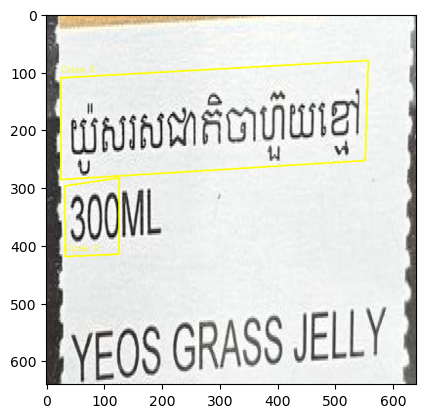

In [57]:
import cv2
import numpy as np

def draw_polygon(image_path, label_path):
    """
    Draws a polygon based on YOLOv5 annotation with multiple points.

    Parameters:
        image_path (str): Path to the image.
        annotation (list): YOLOv5 annotation with multiple polygon points.
    
    Returns:
        None
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return

    height, width, _ = image.shape  # Get image dimensions

    with open(label_path, 'r') as file:
        for line in file:
            annotation = line.split()

            # Extract class ID and points
            class_id = annotation[0]
            points = annotation[1:]
            
            # Convert normalized points to pixel values
            points = [(int(float(x) * width), int(float(y) * height)) for x, y in zip(points[::2], points[1::2])]

        
            # Draw the polygon
            color = (255, 255, 0)  # Green for the polygon
            cv2.polylines(image, [np.array(points)], isClosed=True, color=color, thickness=2)

            # Label the polygon with the class_id
            cv2.putText(image, f"Class {class_id}", (points[0][0], points[0][1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    # Display the image
    plt.imshow(image)

draw_polygon(image_path, label_path)
